<a href="https://colab.research.google.com/github/Syedaly/ML-Supervised/blob/main/LinearRegression(Poly)_Pumpkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
!wget https://raw.githubusercontent.com/Syedaly/ML-Supervised/main/US-pumpkins.csv
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

--2024-02-05 13:28:00--  https://raw.githubusercontent.com/Syedaly/ML-Supervised/main/US-pumpkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172012 (168K) [text/plain]
Saving to: ‘US-pumpkins.csv.2’

US-pumpkins.csv.2   100%[===================>] 167.98K  --.-KB/s    in 0.08s   

2024-02-05 13:28:00 (2.01 MB/s) - ‘US-pumpkins.csv.2’ saved [172012/172012]



,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [28]:
columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins.head()

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,10/8/16


In [4]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [29]:

new_pumpkins = pd.DataFrame({'Month': month, 'Variety':pumpkins['Variety'], 'City':pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
# Check for non-null values in the 'Package' column
mask = new_pumpkins['Package'].notna()

# Apply the mask to filter out NaN values
new_pumpkins = new_pumpkins[mask]

#new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('1 1/9', case=True, regex=True)]
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5


Text(0, 0.5, 'Pumpkin Price')

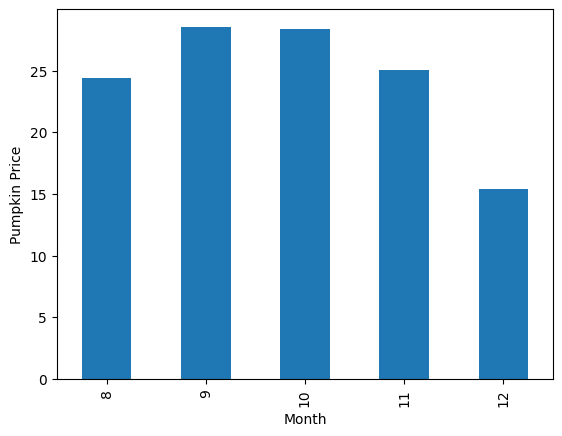

In [6]:
import matplotlib.pyplot as plt
#price = new_pumpkins.Price
#month = new_pumpkins.Month
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
X = new_pumpkins['Month'].to_numpy().reshape(-1,1)
y = new_pumpkins['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [11]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 10.7 (38.3%)


In [12]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.01604566774846994


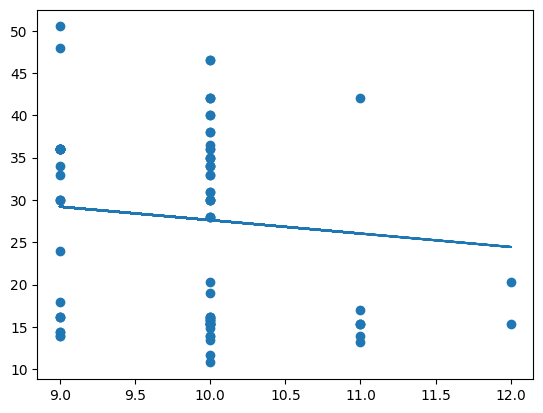

In [13]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [30]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']


In [31]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
# setup and train the pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [33]:
# predict results for test data
pred = pipeline.predict(X_test)


In [34]:
# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.35 (8.68%)
Model determination:  0.9626157499905119
